## 07. 문서 군집화 소개와 실습

### 문서 군집화(Document Clustering)
문서 군집화는 비슷한 텍스트 구성의 문서를 군집화하는 것이다. 동일한 군집으로 분류한다는 점에서 문서 분류와 유사하지만 비지도학습 기반이라는 점에서 차이가 있다.

#### Opinion Review 데이터셋 이용 실습
참고: https://archive.ics.uci.edu/ml/datasets/Opinosis+Opinion+%26frasl%3B+Review

In [7]:
import pandas as pd
import glob, os

path = r'C:\Users\JIHYE\Desktop\projects\Python_ML_guide\data\OpinosisDataset1.0\topics'
#지정한 데렉터리 아래의 모든 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    #개별 파일 로드
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    
    #절대 경로로 주어진 파일명 추출
    filename_ = file_.split("\\")[-1]
    filename = filename_.split('.')[0]
    
    filename_list.append(filename)
    opinion_text.append(df.to_string())

#파일명의 list와 파일내용 list 객체를 데이터프레임으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


토크를 다시 보며 이해해보자

In [15]:
all_files[0:2]

['C:\\Users\\JIHYE\\Desktop\\projects\\Python_ML_guide\\data\\OpinosisDataset1.0\\topics\\accuracy_garmin_nuvi_255W_gps.txt.data',
 'C:\\Users\\JIHYE\\Desktop\\projects\\Python_ML_guide\\data\\OpinosisDataset1.0\\topics\\bathroom_bestwestern_hotel_sfo.txt.data']

In [16]:
all_files[0].split("\\")[-1] #\\로 자르고 마지막 부분 추출

'accuracy_garmin_nuvi_255W_gps.txt.data'

In [17]:
all_files[0].split("\\")[-1].split('.')[0] #.으로 자르고 첫번째 부분 추출

'accuracy_garmin_nuvi_255W_gps'

다시 돌아가면,

In [18]:
# 토크나이저 정의
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                            ngram_range = (1,2), min_df = 0.05, max_df = 0.85)
#opinion_text 칼럼 값 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [20]:
#군집화 - Kmeans 이용
from sklearn.cluster import KMeans

#5개 군집으로 군집화
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_Centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,3
3,battery-life_ipod_nano_8gb,...,3
4,battery-life_netbook_1005ha,...,3


In [23]:
document_df[document_df['cluster_label']==0].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0
33,satellite_garmin_nuvi_255W_gps,...,0
34,screen_garmin_nuvi_255W_gps,...,0
43,speed_garmin_nuvi_255W_gps,...,0
47,transmission_toyota_camry_2007,...,0
48,updates_garmin_nuvi_255W_gps,...,0


군집 0은 주로 garmin_nuvi라는 차량용 네비게이션에 대한 리뷰

In [24]:
document_df[document_df['cluster_label']==1].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,1
13,food_holiday_inn_london,...,1
14,food_swissotel_chicago,...,1
15,free_bestwestern_hotel_sfo,...,1
20,location_bestwestern_hotel_sfo,...,1
21,location_holiday_inn_london,...,1
24,parking_bestwestern_hotel_sfo,...,1
28,price_holiday_inn_london,...,1
32,room_holiday_inn_london,...,1
30,rooms_bestwestern_hotel_sfo,...,1


군집 1은 주로 호텔에 대한 리뷰

In [25]:
document_df[document_df['cluster_label']==2].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,2
7,comfort_toyota_camry_2007,...,2
16,gas_mileage_toyota_camry_2007,...,2
17,interior_honda_accord_2008,...,2
18,interior_toyota_camry_2007,...,2
22,mileage_honda_accord_2008,...,2
25,performance_honda_accord_2008,...,2
29,quality_toyota_camry_2007,...,2
37,seats_honda_accord_2008,...,2


군집 2는 토요타, 혼다 등 주로 자동차에 대한 리뷰

In [26]:
document_df[document_df['cluster_label']==3].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,...,3
3,battery-life_ipod_nano_8gb,...,3
4,battery-life_netbook_1005ha,...,3
26,performance_netbook_1005ha,...,3
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,3
49,video_ipod_nano_8gb,...,3


군집 3은 킨들, 아이팟, 넷북 등 전자기기에 대한 리뷰

In [27]:
document_df[document_df['cluster_label']==4].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
5,buttons_amazon_kindle,...,4
10,eyesight-issues_amazon_kindle,...,4
11,features_windows7,...,4
12,fonts_amazon_kindle,...,4
19,keyboard_netbook_1005ha,...,4
23,navigation_amazon_kindle,...,4
27,price_amazon_kindle,...,4
35,screen_ipod_nano_8gb,...,4
36,screen_netbook_1005ha,...,4
41,size_asus_netbook_1005ha,...,4


In [28]:
# 다시 3개로 군집화
from sklearn.cluster import KMeans

#5개 군집으로 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_Centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0


In [29]:
document_df[document_df['cluster_label']==0].sort_values(by = 'filename')
#군집 0은 전자기기

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0
5,buttons_amazon_kindle,...,0
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0
10,eyesight-issues_amazon_kindle,...,0
11,features_windows7,...,0
12,fonts_amazon_kindle,...,0


In [30]:
document_df[document_df['cluster_label']==1].sort_values(by = 'filename')
#군집 1은 호텔

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,1
13,food_holiday_inn_london,...,1
14,food_swissotel_chicago,...,1
15,free_bestwestern_hotel_sfo,...,1
20,location_bestwestern_hotel_sfo,...,1
21,location_holiday_inn_london,...,1
24,parking_bestwestern_hotel_sfo,...,1
28,price_holiday_inn_london,...,1
32,room_holiday_inn_london,...,1
30,rooms_bestwestern_hotel_sfo,...,1


In [31]:
document_df[document_df['cluster_label']==2].sort_values(by = 'filename')
#군집 2는 자동차

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,2
7,comfort_toyota_camry_2007,...,2
16,gas_mileage_toyota_camry_2007,...,2
17,interior_honda_accord_2008,...,2
18,interior_toyota_camry_2007,...,2
22,mileage_honda_accord_2008,...,2
25,performance_honda_accord_2008,...,2
29,quality_toyota_camry_2007,...,2
37,seats_honda_accord_2008,...,2
47,transmission_toyota_camry_2007,...,2


#### 군집별 핵심 단어 추출하기

각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 cluster_centers_ 속성 이용 : 1에 가까울수록 중심과 가깝다.

In [32]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


이는 단어 피처 4611개가 각각 군집의 중심과의 거리가 어느 정도인지 나타낸다. 각 군집마다 큰 값을 가지는 단어 피처를 추출하면 핵심 단어를 알 수 있다.

In [45]:
##군집별 ton n 핵심 단어(top_features), 
##그 단어의 중심 위치 상댓값(top_feature_values), 
##대상 파일명(filenames) 반환하는 함수 정의
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features = 10):
    cluster_details = {}
    #cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값 반환
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    ##개별 군집별 
    for cluster_num in range(cluster_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        ## 탑 피쳐 단어 top_features
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        ## 피쳐 단어의 중심 위차 상댓값 top_feature_values
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        #딕셔너리 객체에 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        
        ## 대상 파일명(filenames)
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print("##### Cluster {0}".format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print("======================================================================")

In [46]:
feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,
                                     feature_names = feature_names, cluster_num = 3, top_n_features = 10)
print_cluster_details(cluster_details)

##### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
##### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명: ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'parking_bestwestern_hotel_sfo']
##### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord

군집 0 - 전자기기, 군집 1 - 호텔, 군집 2 - 자동차와 걸맞는 단어들이 나옴

## 08. 문서 유사도

#### 코사인 유사도
벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다.
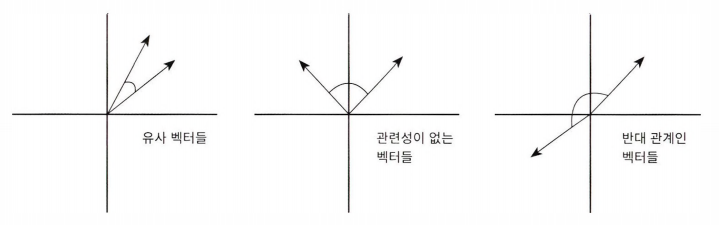

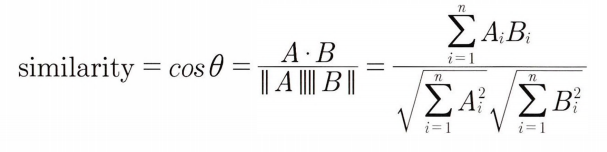

In [48]:
# 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수 작성
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    return similarity

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, I show you deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 17)


In [55]:
#TfidfVectorizer로 transform한 결과는 희소행렬이므로 밀집행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
similarity_simple

0.40207758214950134

In [56]:
vect1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.24543856, 0.        , 0.24543856, 0.        , 0.        ,
       0.        , 0.        , 0.4155636 , 0.24543856, 0.49087711,
       0.        , 0.24543856])

In [57]:
vect2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.23402865, 0.39624495, 0.23402865, 0.        , 0.3013545 ,
       0.        , 0.39624495, 0.        , 0.23402865, 0.23402865,
       0.39624495, 0.4680573 ])

In [58]:
#첫번째 문장과 세번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

#첫번째 문장과 세번째 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect3)
similarity_simple

0.4251761311365618

In [59]:
#두번째 문장과 세번째 문장의 피처 벡터 추출
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

#두번째 문장과 세번째 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect2, vect3)
similarity_simple

0.4801018979402068

이번엔 사이킷런에서 제공하는 코사인유사도 측정 API를 이용해보자. \
cosine_similarity()는 희소행렬, 밀집행렬, 배열 모두 가능하다.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
#첫번째 문장과 모든 문장의 코사인 유사도 
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
similarity_simple_pair

array([[1.        , 0.40207758, 0.42517613]])

In [62]:
#서로간의 코사인 유사도 행렬
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
similarity_simple_pair

array([[1.        , 0.40207758, 0.42517613],
       [0.40207758, 1.        , 0.4801019 ],
       [0.42517613, 0.4801019 , 1.        ]])

#### Opinion Review 데이터셋 이용한 문서 유사도 측정

In [63]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\JIHYE\Desktop\projects\Python_ML_guide\data\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    filename_ = file_.split("\\")[-1]
    filename = filename_.split(".")[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english', 
                            ngram_range = (1,2), min_df = 0.05, max_df = 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [66]:
#호텔로 군집화된 문서간의 유사도
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes = document_df[document_df['cluster_label']==1].index
print("호텔로 군집화된 문서들의 데이터프레임 인덱스:", hotel_indexes)

comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도 #####')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
similarity_pair

호텔로 군집화된 문서들의 데이터프레임 인덱스: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo 와 타 문서 유사도 #####


array([[1.        , 0.0430688 , 0.05221059, 0.06189595, 0.05846178,
        0.06193118, 0.03638665, 0.11742762, 0.38038865, 0.32619948,
        0.51442299, 0.11282857, 0.13989623, 0.1386783 , 0.09518068,
        0.07049362]])

좀 더 직관적인 결과를 위해, 해당 문서와 유사도가 높은 순으로 정렬하여 시각화해보자.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

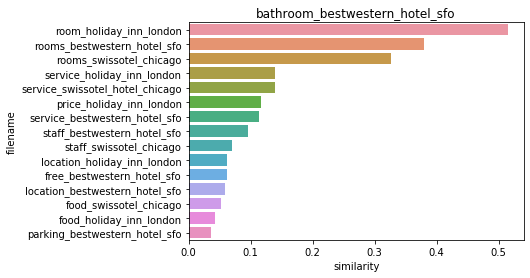

In [67]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 유사도 높은 순 정렬
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:] #자기자신 제외
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
# 유사도 높은 순으로 값을 정렬
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:] #자기자신 제외
#시각화할 데이터셋 구축
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

#시각화
sns.barplot(x='similarity', y='filename', data = hotel_1_sim_df)
plt.title(comparison_docname)